In [16]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [17]:
wine_price = pd.read_csv('/Users/CW/Desktop/0_CAB/Wine_Project_backup/wine_sales_data (2).csv', sep =',', on_bad_lines='skip', engine='python', index_col=False)

#display(wine_price.head())

In [18]:
wine_price

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [4]:
display(wine_price.tail())

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset
150929,150929,Italy,More Pinot Grigios should taste like this. A r...,NaN,90,15.0,Northeastern Italy,Alto Adige,NaN,Pinot Grigio,Alois Lageder


In [19]:
data = wine_price 
print('Original dataset shape:', wine_price.shape)

# remove duplicates from the dataset
wines_cleaned = wine_price.drop_duplicates()

# print the number of rows in the cleaned dataset
print('Cleaned dataset shape:', wines_cleaned.shape)

Original dataset shape: (150930, 11)
Cleaned dataset shape: (150930, 11)


In [6]:
data = wine_price
# Count the number of wines from the Vinho Verde region
num_vinho_verde = len(wines_cleaned[wines_cleaned['province'] == 'Vinho Verde'])

# Print the results
print(f'Number of wines from Vinho Verde region: {num_vinho_verde}')


Number of wines from Vinho Verde region: 396


In [7]:
wines_cleaned 
filtered_wines = wine_price[(wine_price['region_1'] == 'Portugal')]

# View the filtered DataFrame
print(filtered_wines)

# Count the number of wines from Portugal
num_portugal = len(wines_cleaned[wines_cleaned['country'] == 'Portugal'])


# Print the results
print(f'Number of wines from Portugal: {num_portugal}')


Empty DataFrame
Columns: [Unnamed: 0, country, description, designation, points, price, province, region_1, region_2, variety, winery]
Index: []
Number of wines from Portugal: 5322


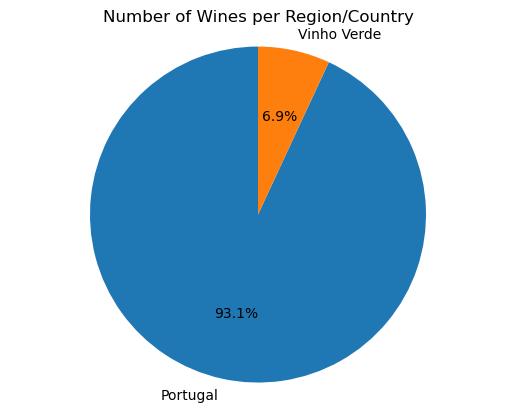

In [14]:
###Piechart

import matplotlib.pyplot as plt

# Data
labels = ['Portugal', 'Vinho Verde']
sizes = [5322, 396]

# Plot
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Number of Wines per Region/Country')

plt.show()




In [96]:
data =wine_price

# Filter the dataframe to include only Vinho Verde province
wine_vinho_verde = wine_price[wine_price["province"] == "Vinho Verde"]

# Calculate the IQR of the price column
q1 = wine_vinho_verde["price"].quantile(0.25)
q3 = wine_vinho_verde["price"].quantile(0.75)
iqr = q3 - q1

# Define the upper and lower bounds for outlier removal
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

# Remove the outliers from the price column
wine_vinho_verde = wine_vinho_verde[(wine_vinho_verde["price"] >= lower_bound) & (wine_vinho_verde["price"] <= upper_bound)]

# Print the number of wines after filtering and outlier removal
print("Number of wines from Vinho Verde region after outlier removal:", len(wine_vinho_verde))


Number of wines from Vinho Verde region after outlier removal: 296


In [98]:
data = wine_price

# Filter for only the Vinho Verde province
vinho_verde = wine_price[wine_price['province'] == 'Vinho Verde']

# Remove outliers from the price column using IQR method
Q1 = vinho_verde['price'].quantile(0.25)
Q3 = vinho_verde['price'].quantile(0.75)
IQR = Q3 - Q1
vinho_verde = vinho_verde[(vinho_verde['price'] >= Q1 - 1.5*IQR) & (vinho_verde['price'] <= Q3 + 1.5*IQR)]

# Cut the price into 3 levels
vinho_verde['price_level'] = pd.cut(vinho_verde['price'], 3, labels=['Low', 'Medium', 'High'])

# Calculate min_price, max_price, mean_price and median_price for each price_level
price_stats = vinho_verde.groupby('price_level')['price'].agg(['min', 'max', 'mean', 'median'])

print(price_stats)


              min   max       mean  median
price_level                               
Low           5.0  10.0   8.207317     8.0
Medium       11.0  15.0  12.630000    12.0
High         16.0  20.0  17.656250    17.5


using the points in the dataset

In [28]:
# check for missing values in the 'column_name' column of the DataFrame
missing_values = data= wine_price['country'].isnull().sum()

# print the number of missing values
print(f"There are {missing_values} missing values in the 'country' column.")
# check for missing values in the 'country' column
print(wine_price['country'].isnull().sum())

# fill missing values with mode value
mode_value = wine_price['country'].mode()[0]
wine_price['country'].fillna(mode_value, inplace=True)

# check again for missing values
print(wine_price['country'].isnull().sum())



There are 5 missing values in the 'country' column.
5
0


In [31]:
data = wine_price
countries = sorted(wine_price['country'].unique())
data['country'] = data['country'].astype(str)
print(countries)


['Albania', 'Argentina', 'Australia', 'Austria', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'China', 'Croatia', 'Cyprus', 'Czech Republic', 'Egypt', 'England', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Israel', 'Italy', 'Japan', 'Lebanon', 'Lithuania', 'Luxembourg', 'Macedonia', 'Mexico', 'Moldova', 'Montenegro', 'Morocco', 'New Zealand', 'Portugal', 'Romania', 'Serbia', 'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Switzerland', 'Tunisia', 'Turkey', 'US', 'US-France', 'Ukraine', 'Uruguay']


In [32]:
data =wine_price


# Count the number of occurrences of each country
country_counts = wine_price['country'].value_counts()

# Print the results
print(country_counts)


US                        62402
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
England 

In [99]:
data =wine_price

# Filter wines from Vinho Verde
vinho_verde = wine_price[wine_price['province'] == 'Vinho Verde']

# Group the wines by their point ratings and calculate mean/median price for each group
price_by_points = vinho_verde.groupby('points')['price'].agg(['mean', 'median'])

# Print the results
print(price_by_points)


             mean  median
points                   
80       8.000000     8.0
82       8.300000     9.5
83       7.500000     8.0
84       8.244444     8.0
85       9.918033     9.0
86      10.225806    10.0
87      12.714286    12.0
88      12.847826    12.0
89      13.653846    12.0
90      15.657143    16.0
91      16.428571    16.0
92      31.000000    33.0


Wines rated 80-84 points: $10-$12
Wines rated 85-89 points: $11-$16
Wines rated 90-94 points: $17-$44 (depending on the specific point rating)
Wines rated 95 points or higher: No data available

getting price per wine based on score for entire data set 

In [11]:
data =wine_price
Portugal = wine_price[wine_price['country'] == 'Portugal']

# Group the wines by their point ratings and calculate mean/median price for each group
price_by_points = Portugal.groupby('points')['price'].agg(['mean', 'median'])

# Print the results
print(price_by_points)

              mean  median
points                    
80       15.714286    12.0
81       16.166667    10.5
82       18.204545    12.0
83       14.094017     9.0
84       12.954386    10.0
85       11.967901    10.0
86       14.196682    11.0
87       19.064073    14.0
88       20.457195    16.0
89       23.211236    19.0
90       28.268390    21.0
91       34.564767    25.0
92       42.284672    32.5
93       61.088050    50.0
94       78.412500    60.0
95      143.030303    90.0
96      159.666667   100.0
97      119.000000    95.0
99      426.000000   426.0


In [12]:
data = wine_price

# Filter for only the Vinho Verde province
Portugal= wine_price[wine_price['country'] == 'Portugal']

# Remove outliers from the price column using IQR method
Q1 = Portugal['price'].quantile(0.25)
Q3 = Portugal['price'].quantile(0.75)
IQR = Q3 - Q1
Portugal = Portugal[(Portugal['price'] >= Q1 - 1.5*IQR) & (Portugal['price'] <= Q3 + 1.5*IQR)]

# Cut the price into 3 levels
Portugal['price_level'] = pd.cut(Portugal['price'], 3, labels=['Low', 'Medium', 'High'])

# Calculate min_price, max_price, mean_price and median_price for each price_level
price_stats = Portugal.groupby('price_level')['price'].agg(['min', 'max', 'mean', 'median'])

print(price_stats)

              min   max       mean  median
price_level                               
Low           4.0  21.0  12.979284    13.0
Medium       22.0  38.0  27.960610    27.0
High         39.0  56.0  46.370474    45.0
